In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]



In [39]:
# these are parameterized over papermill
from cisclient.client import CISClient
from lcb.cisvis.spectra import generate_spectra_plot, generate_similarity_plot, to_dataframe
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
libraries = []

soqe[M+H][M+NH4] | QExactive | test | positive
contains 121 confirmed


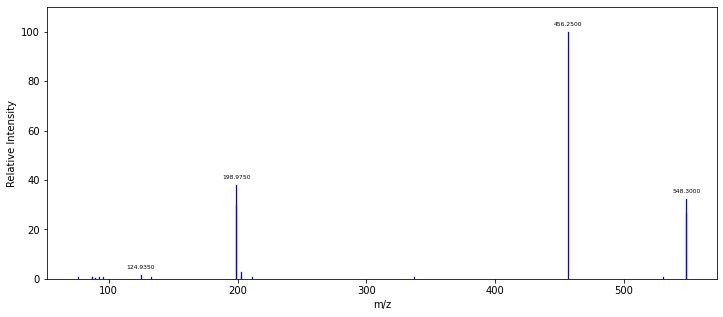

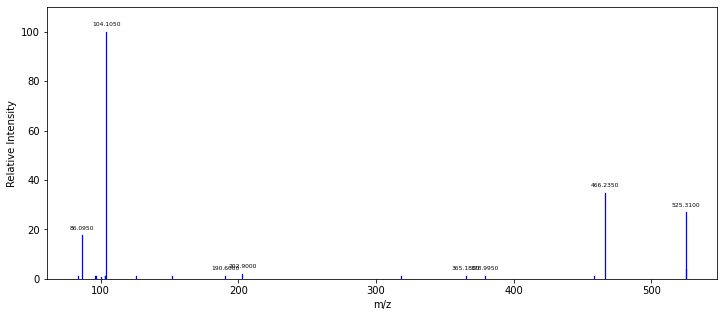

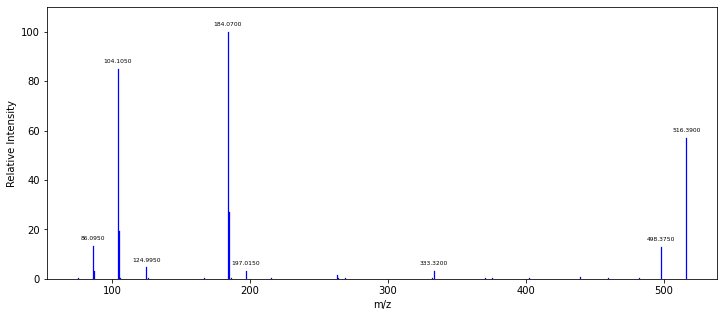

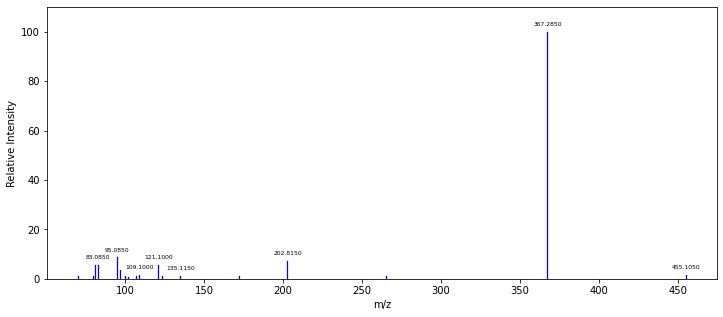

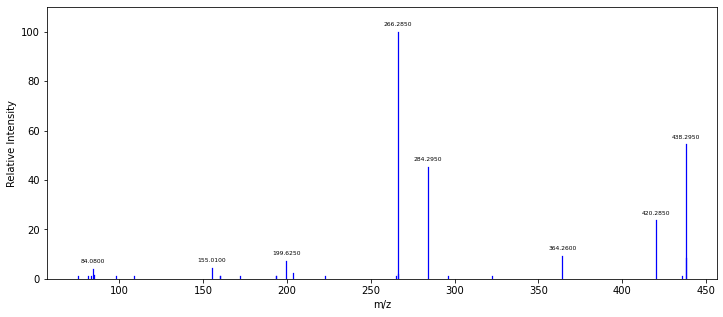

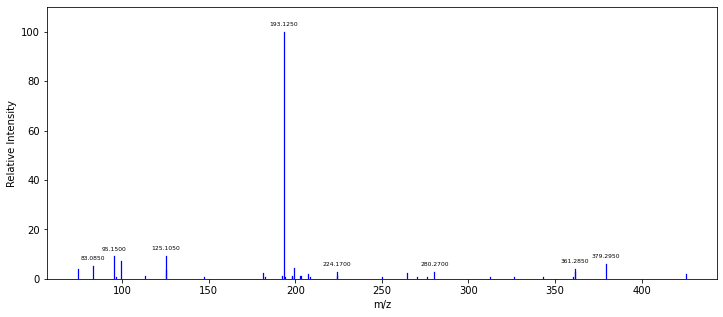

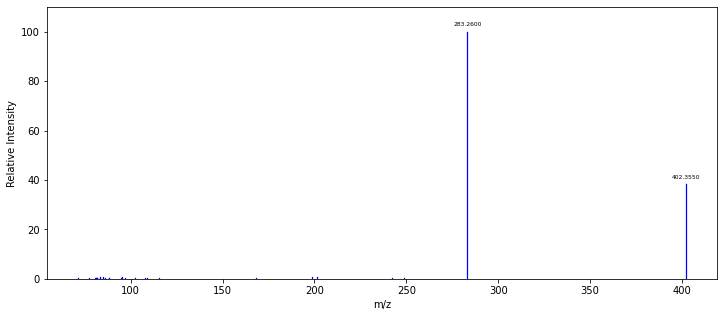

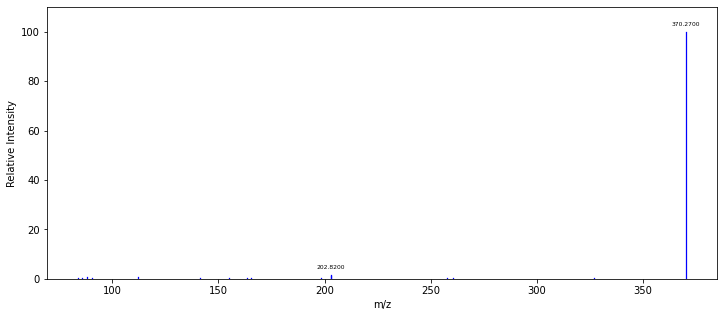

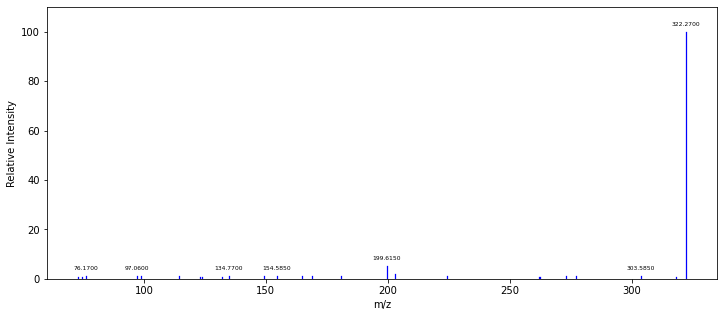

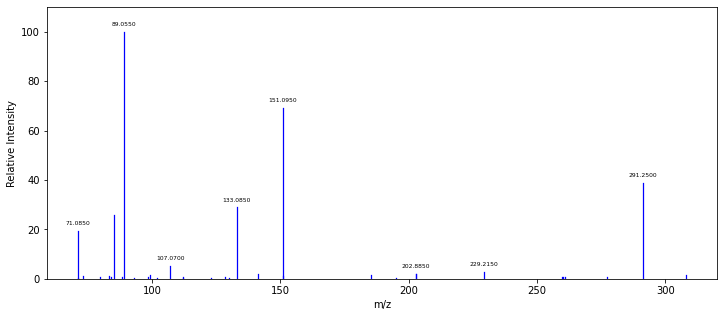

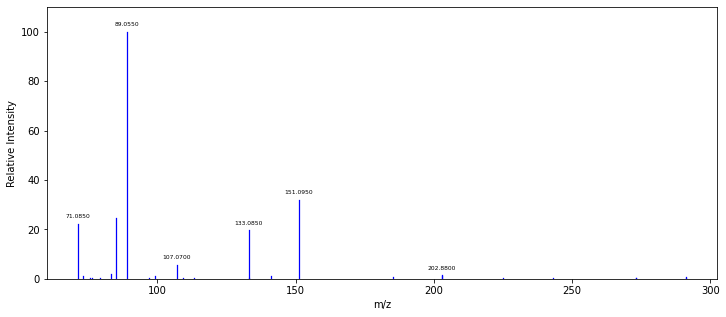

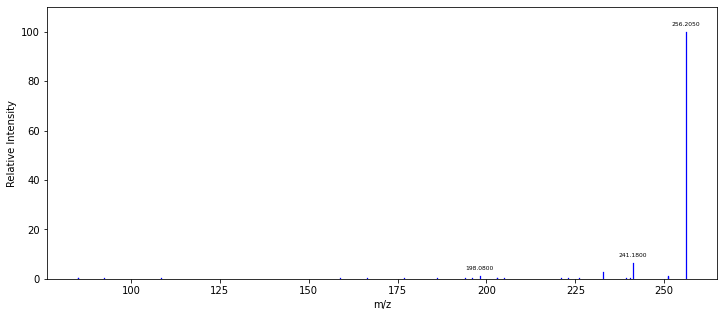

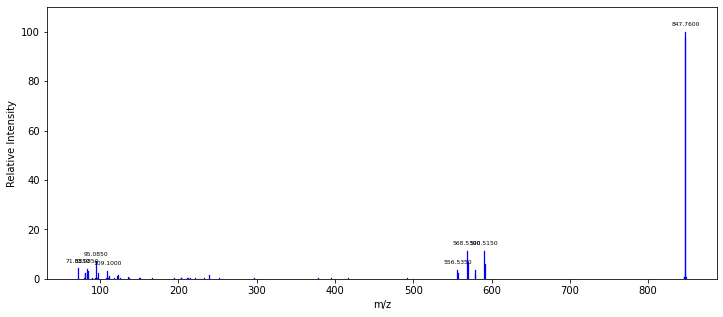

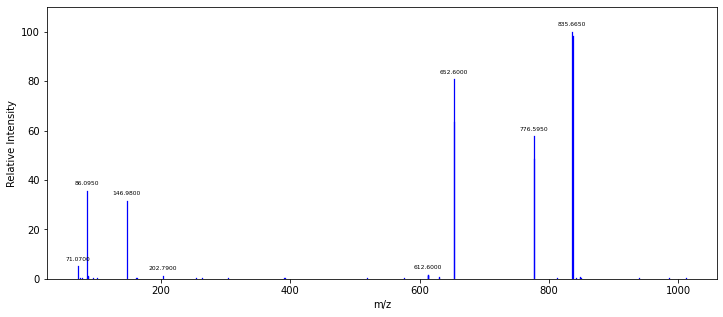

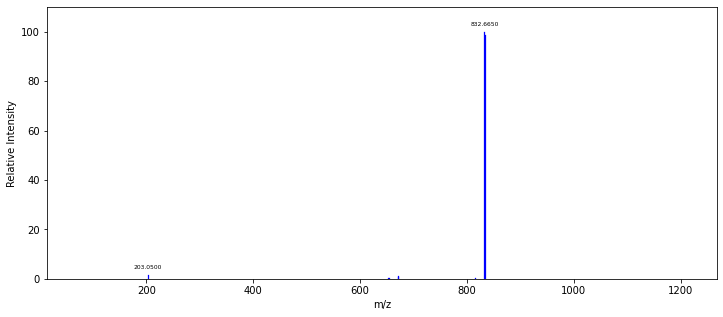

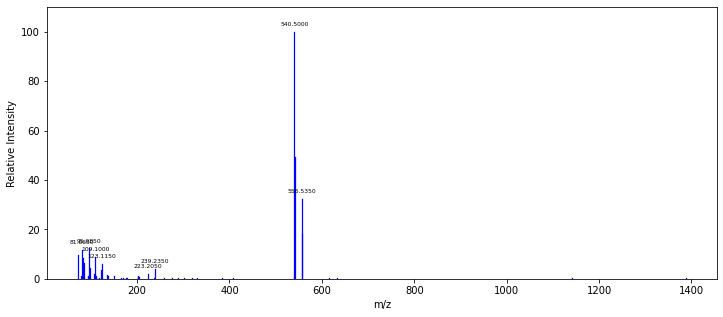

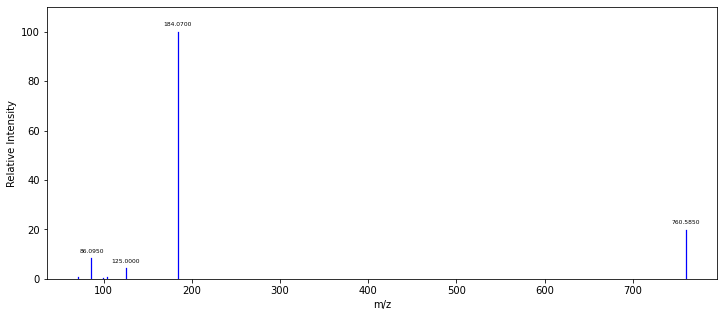

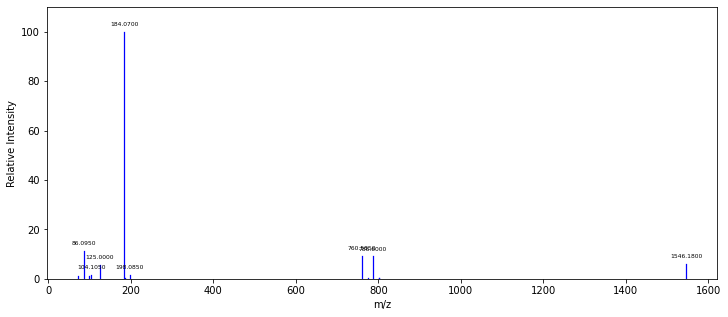

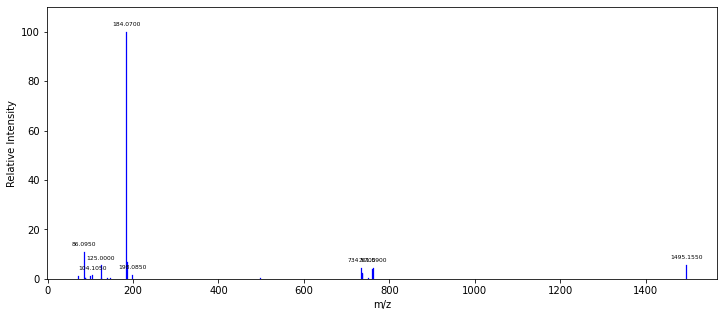

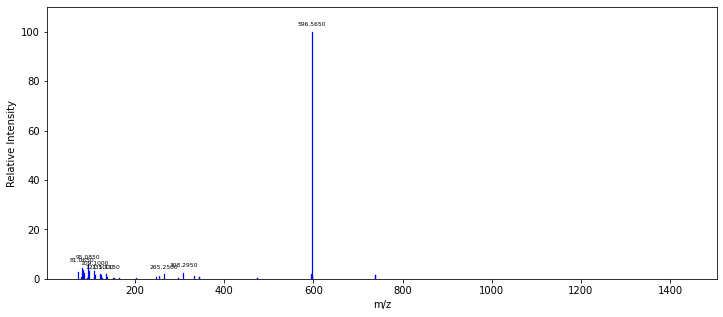

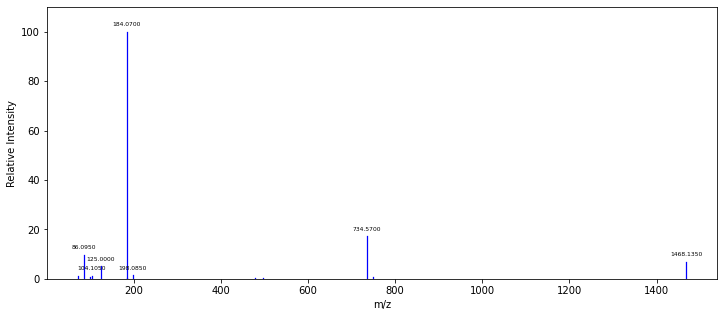

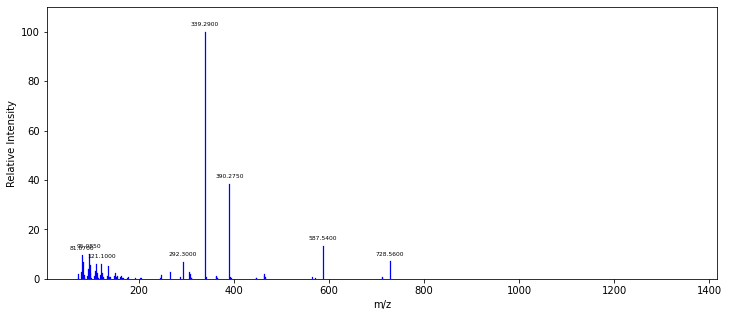

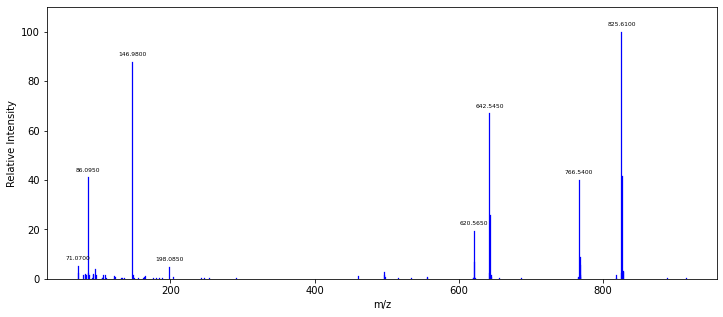

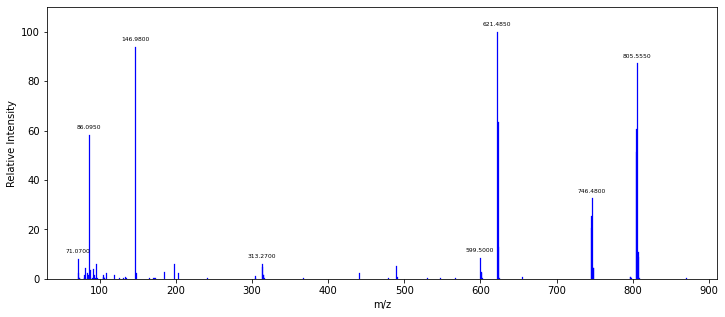

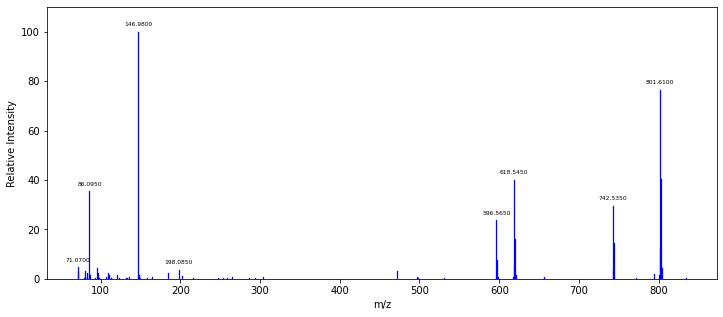

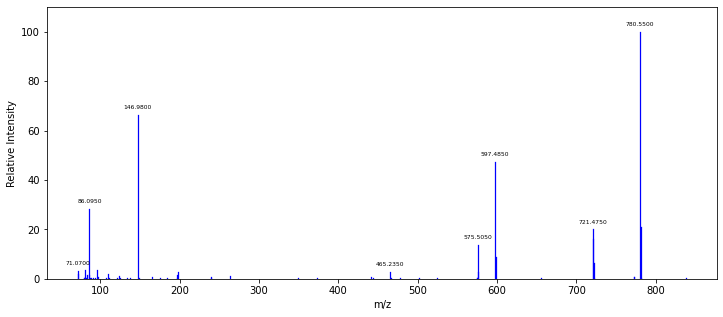

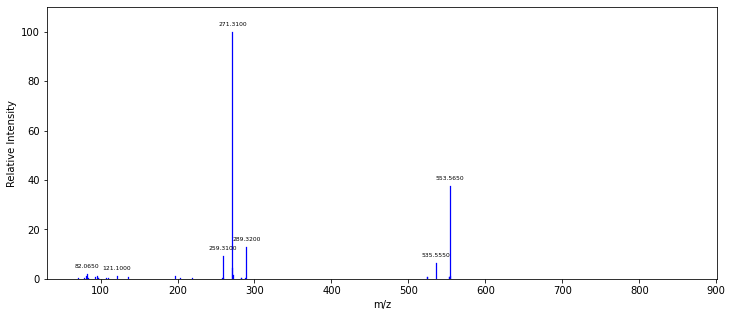

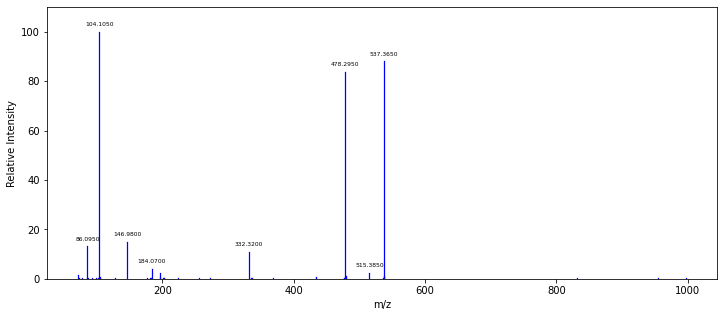

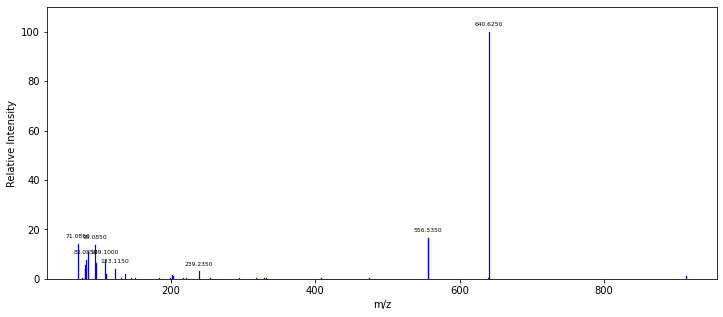

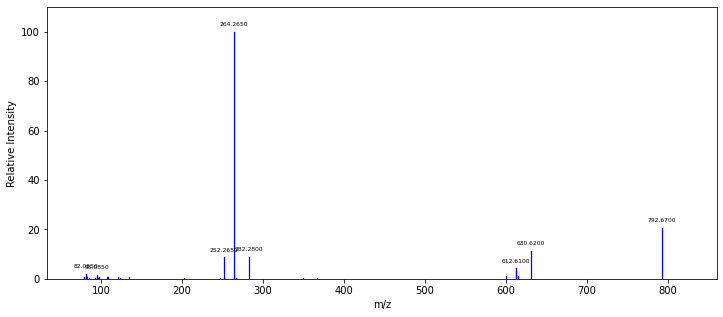

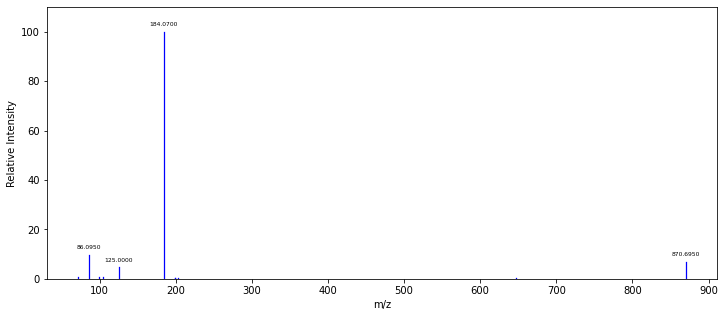

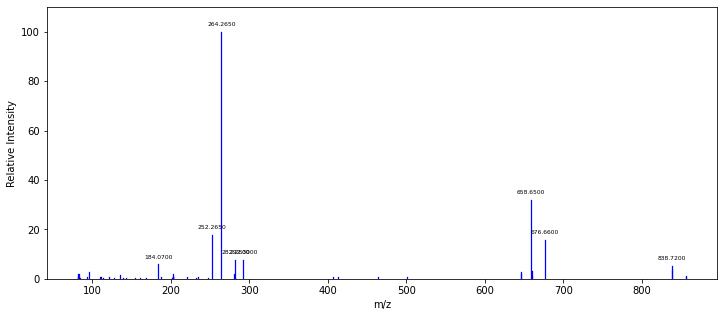

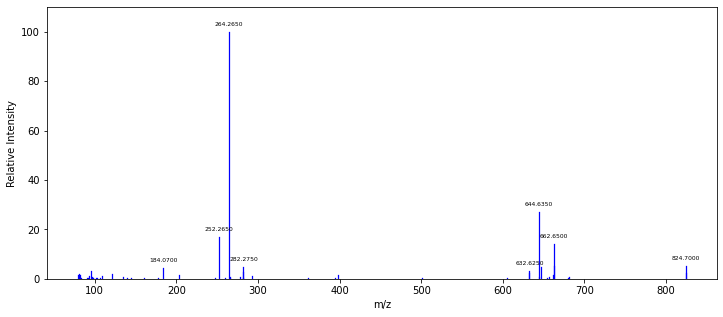

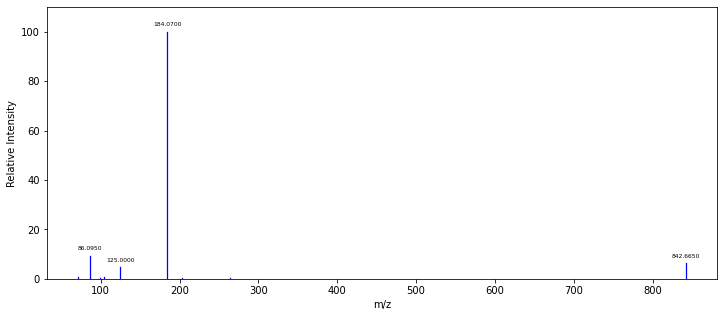

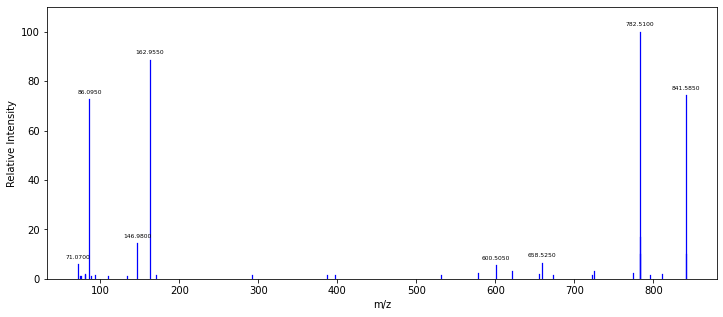

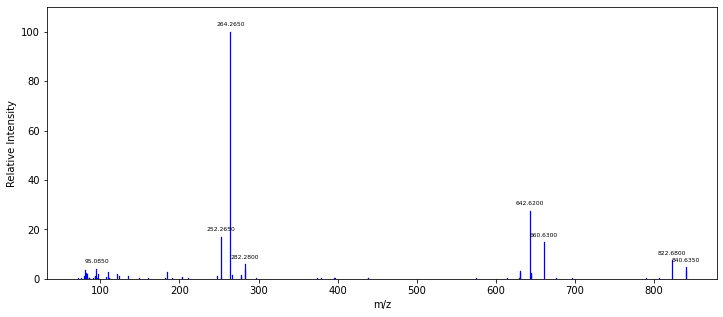

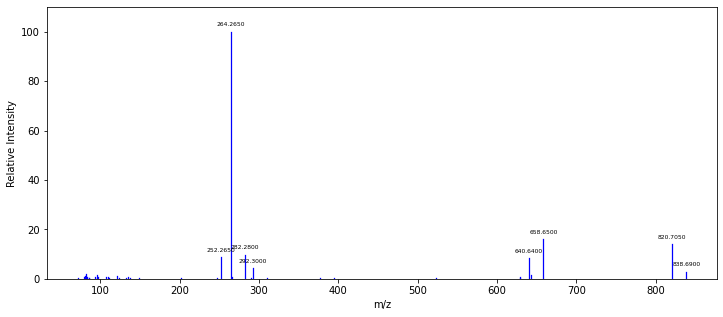

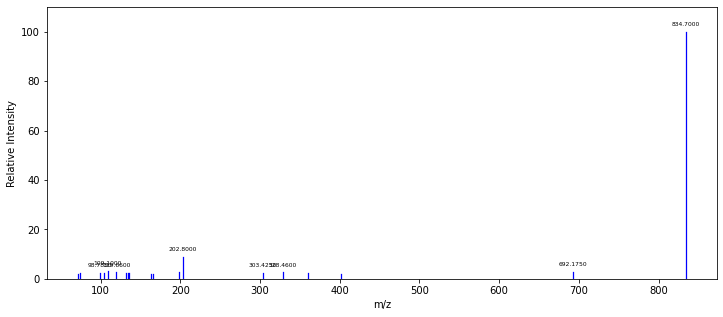

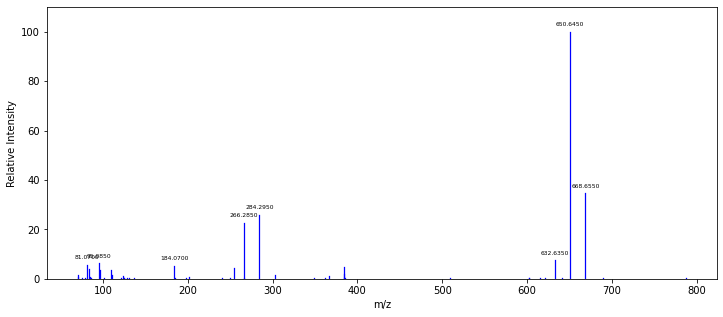

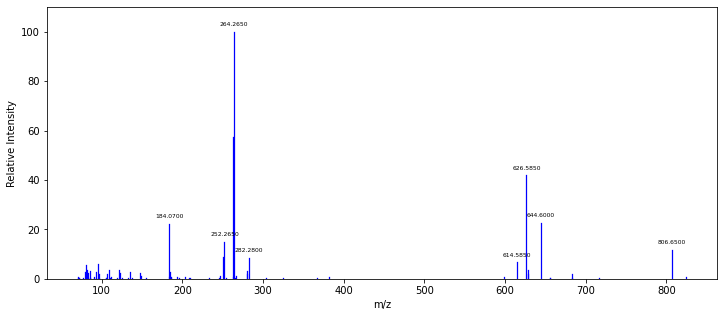

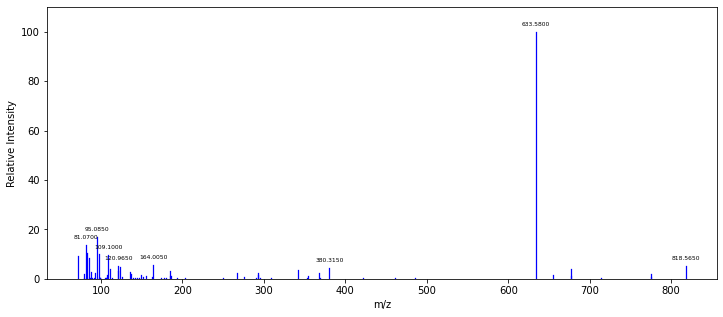

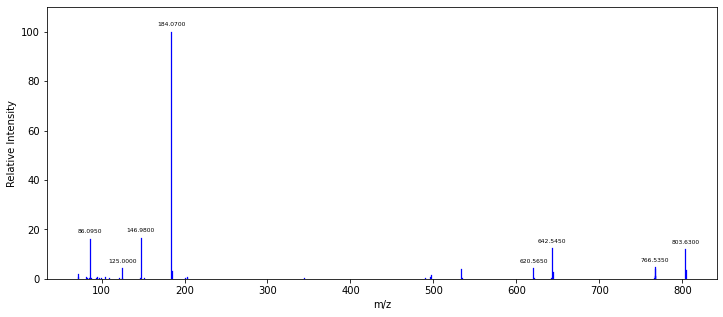

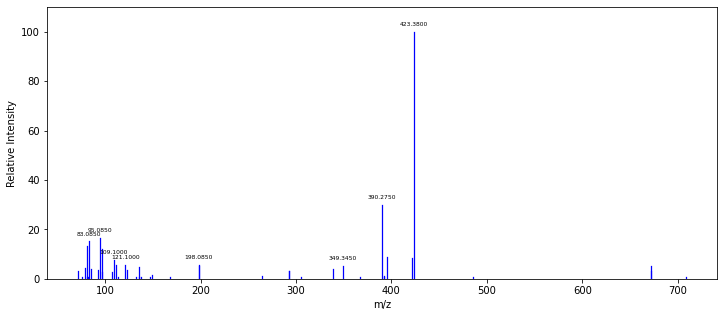

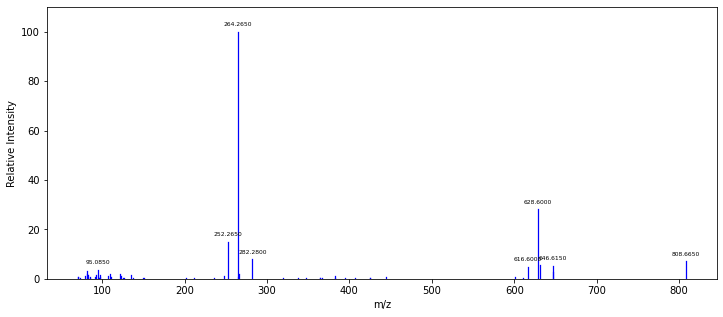

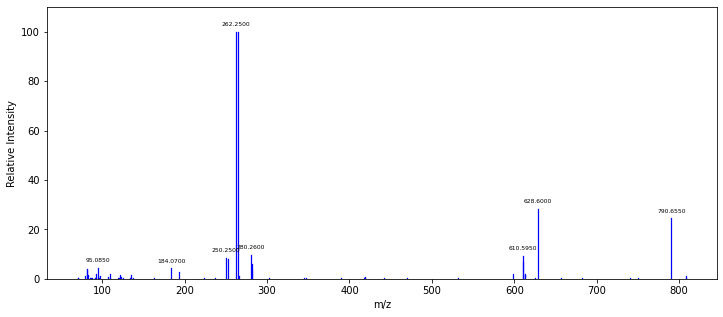

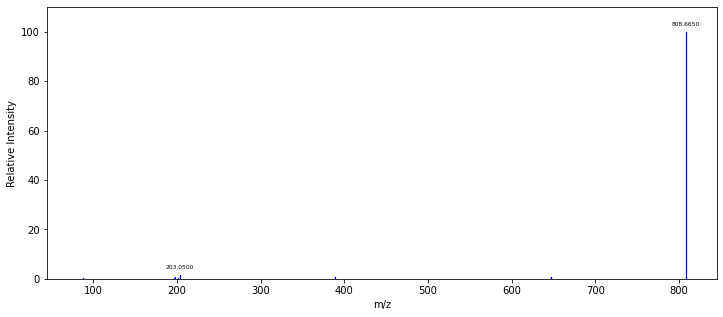

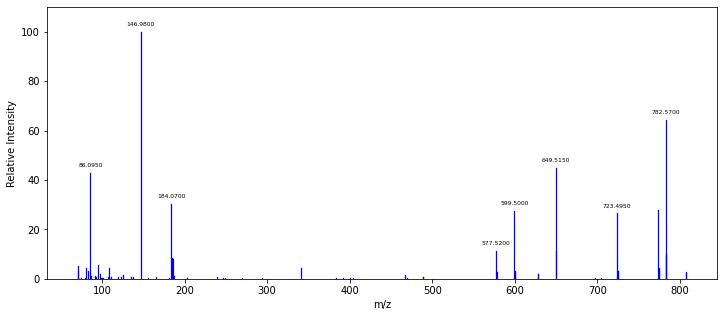

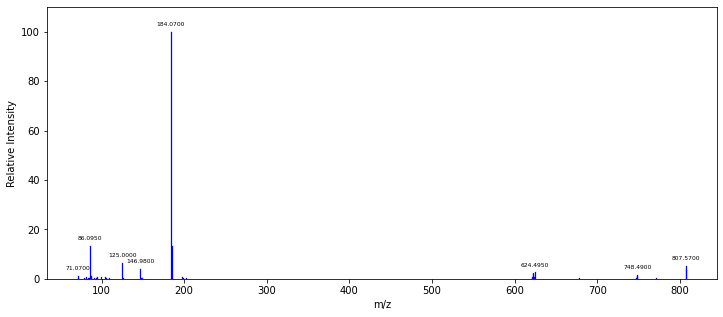

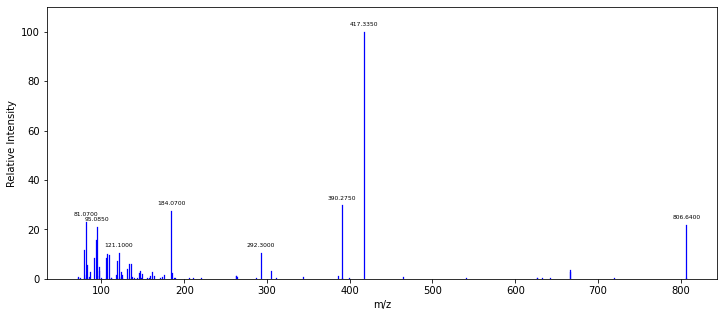

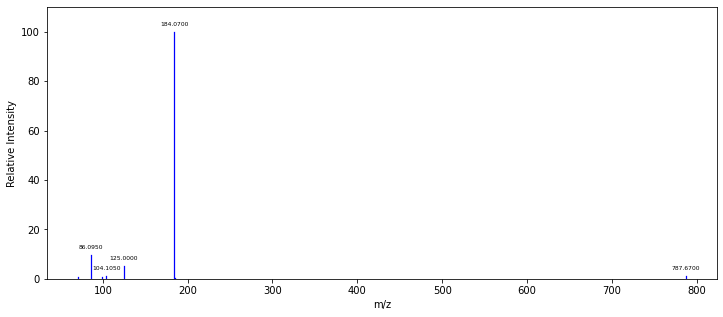

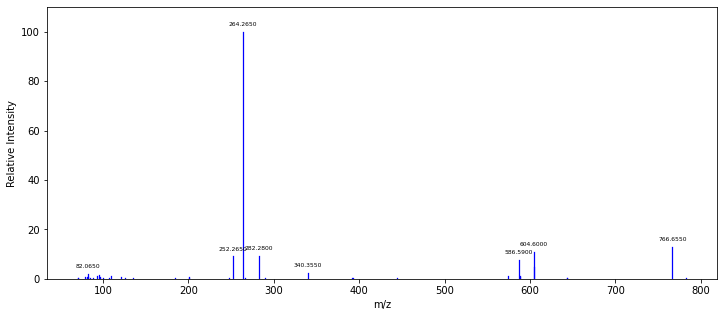

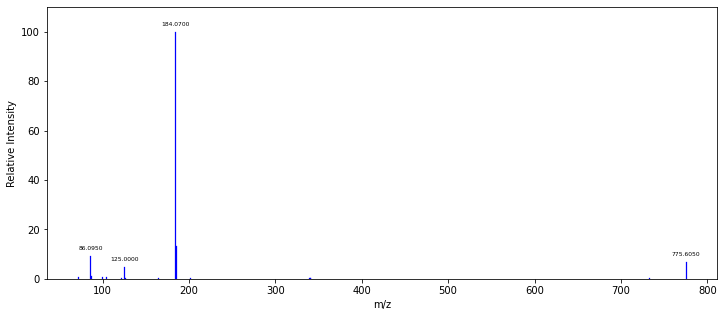

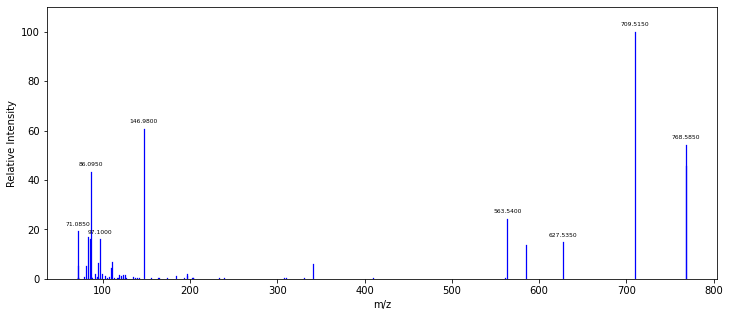

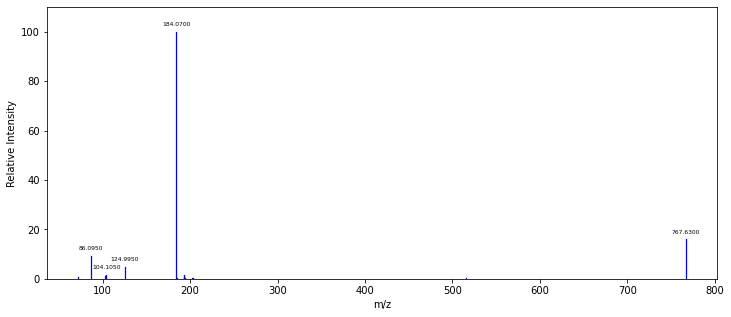

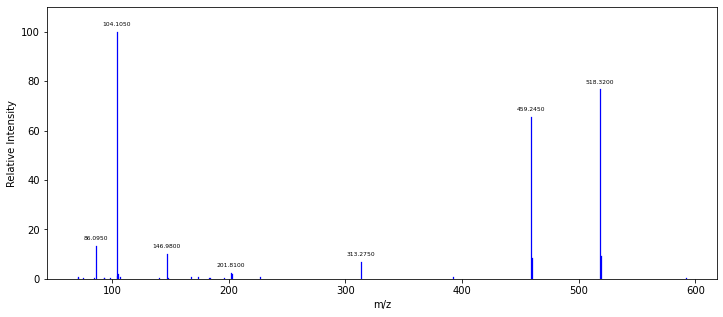

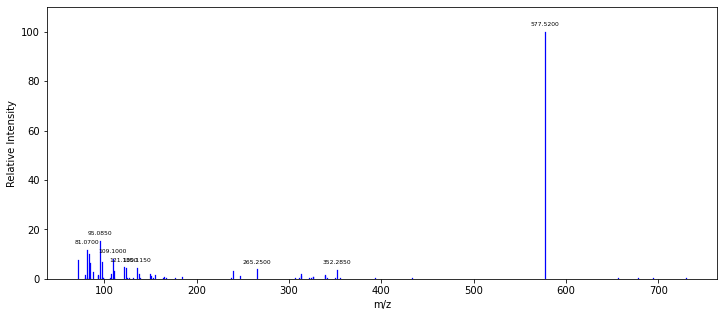

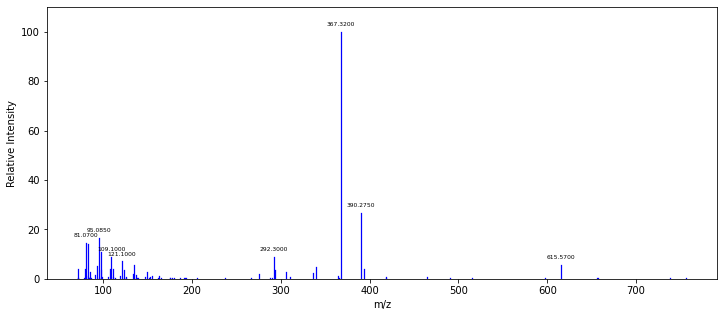

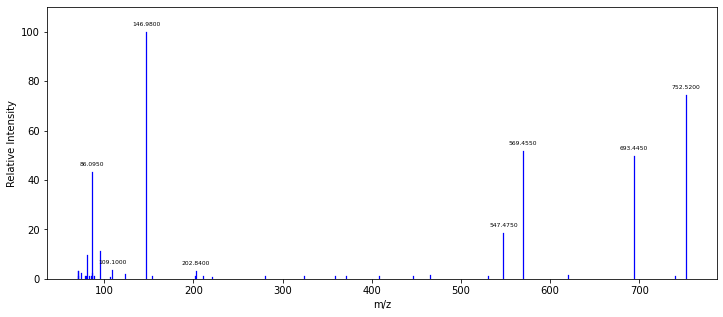

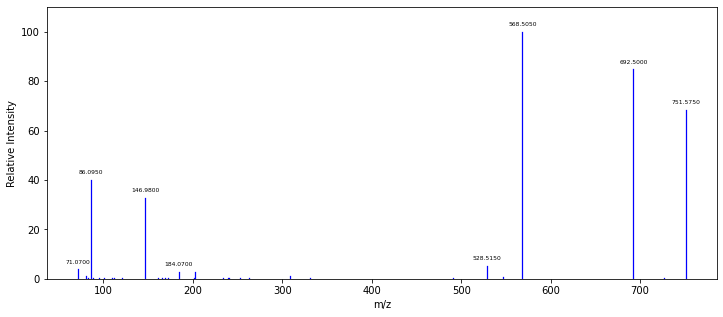

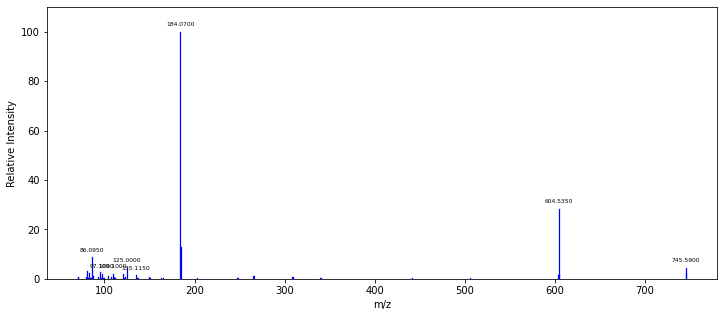

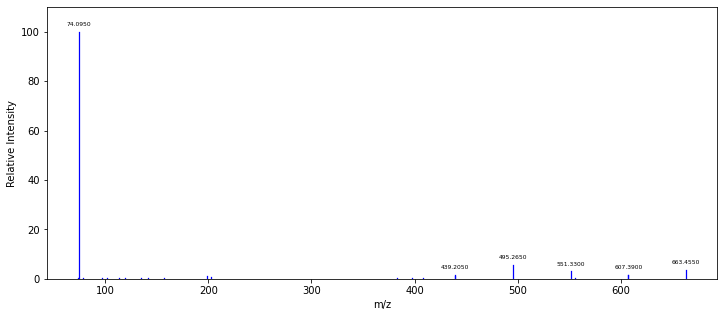

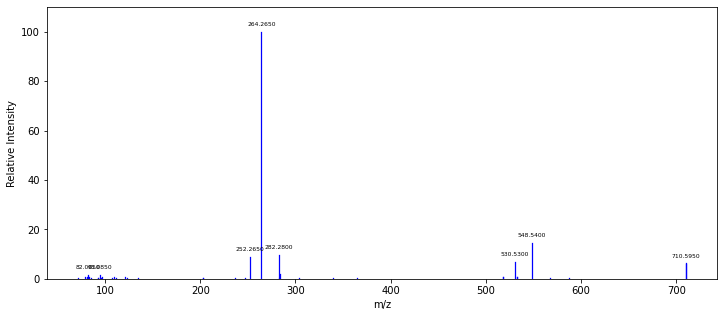

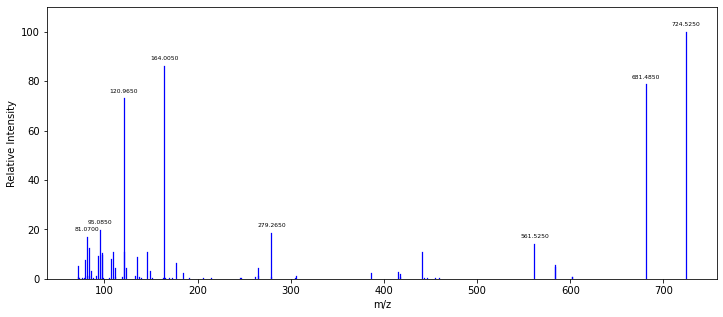

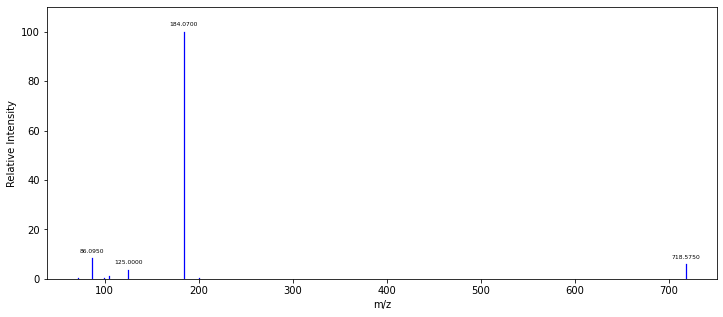

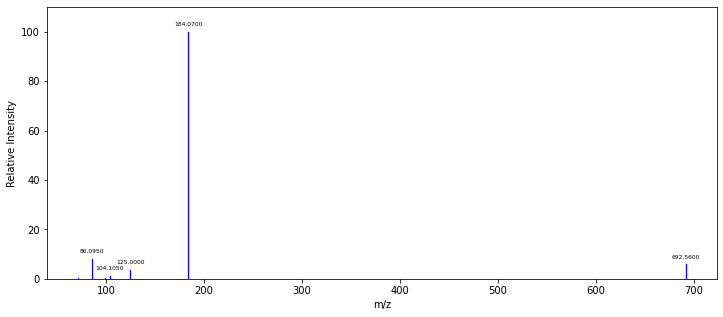

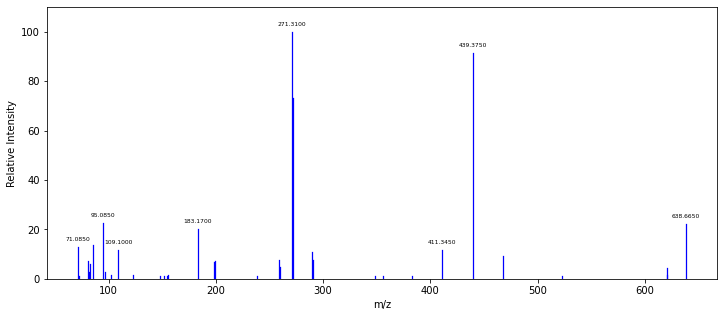

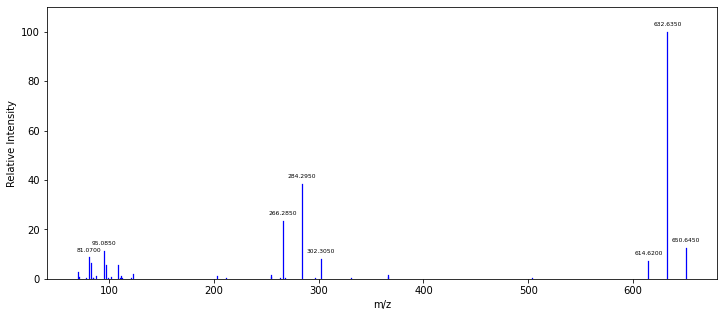

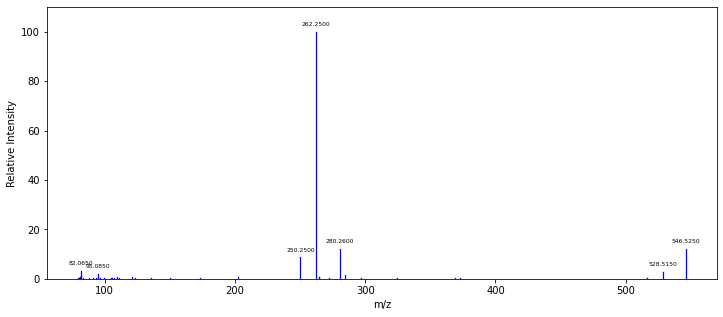

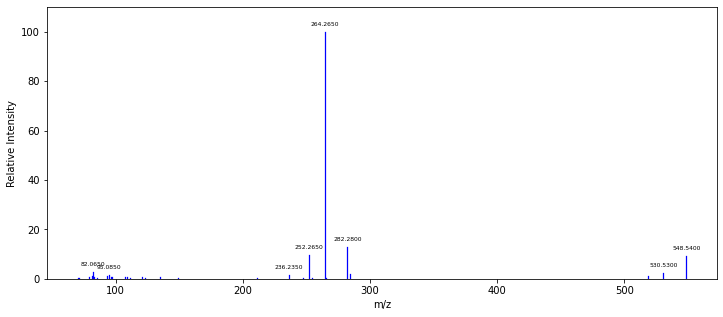

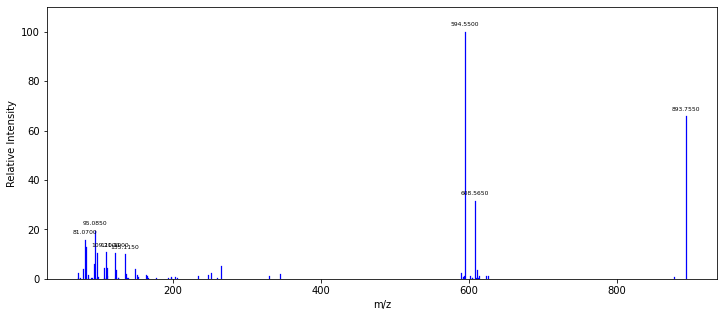

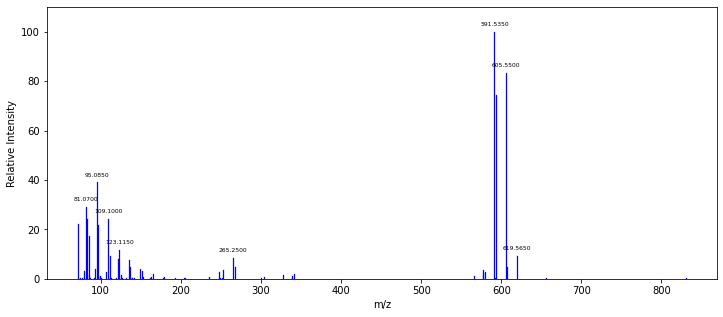

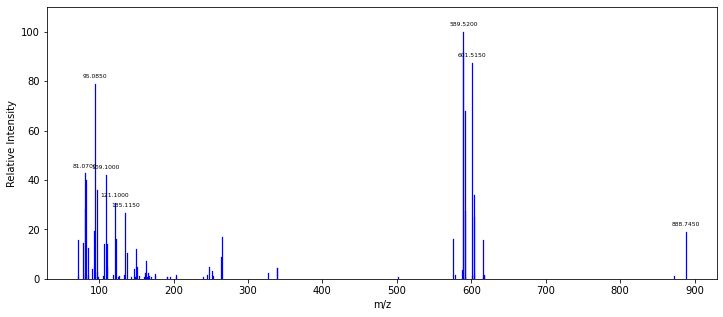

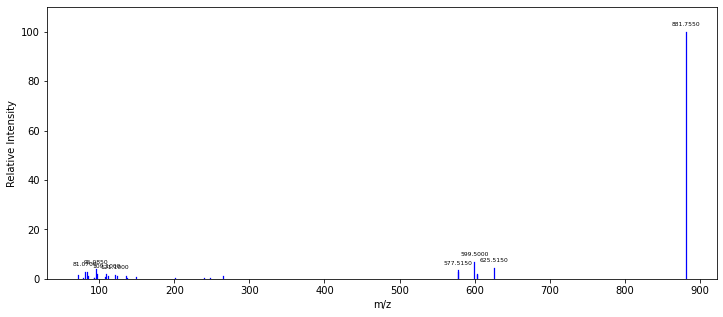

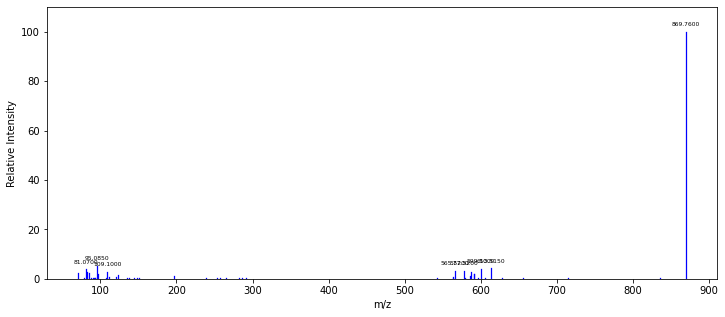

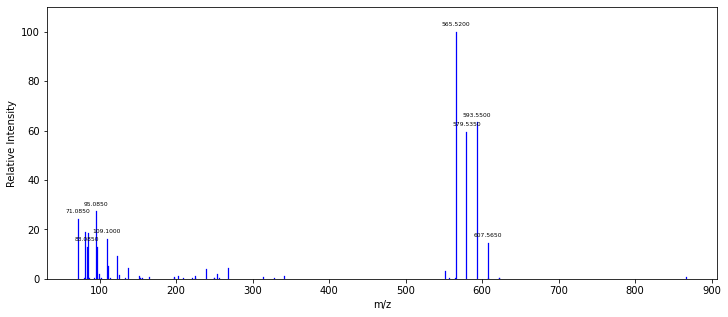

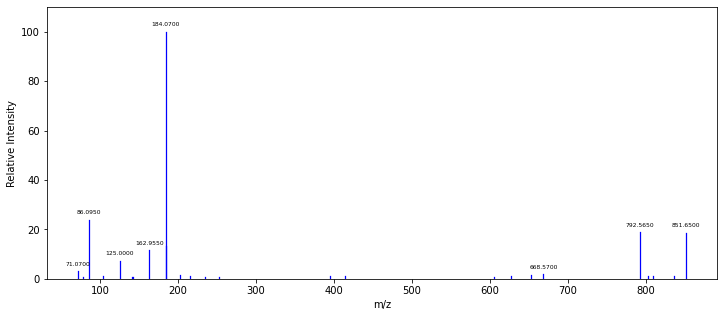

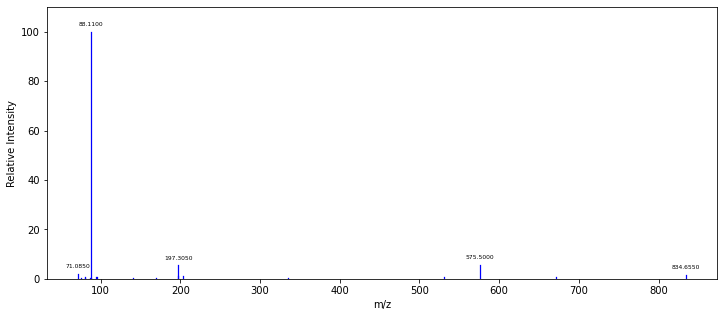

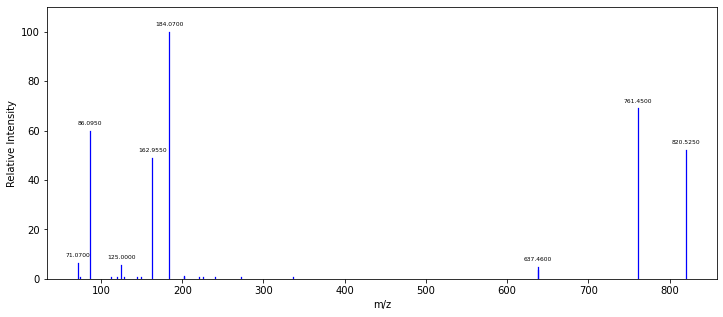

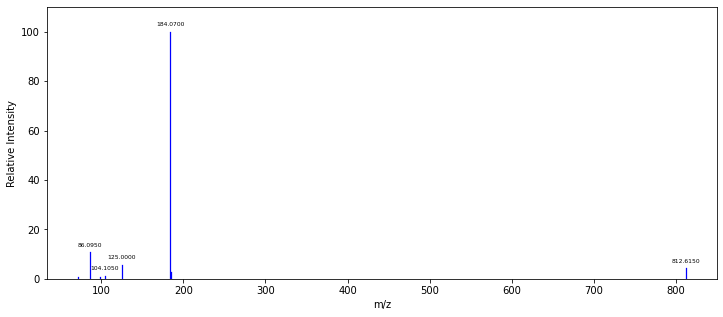

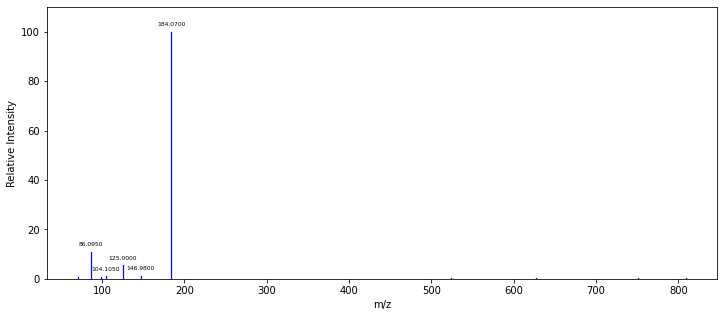

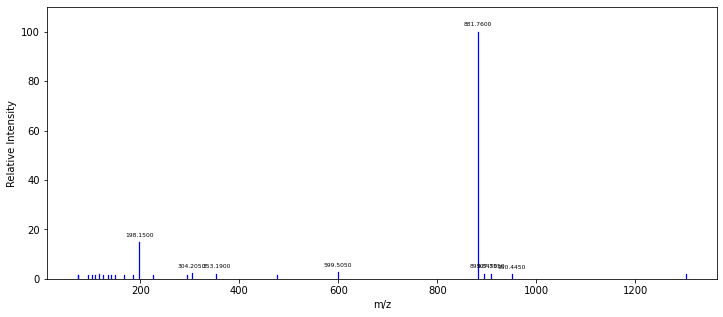

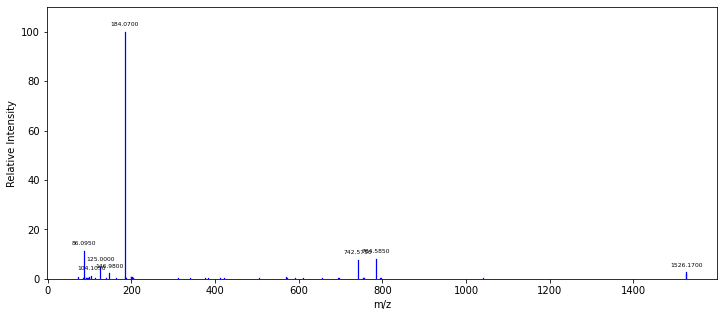

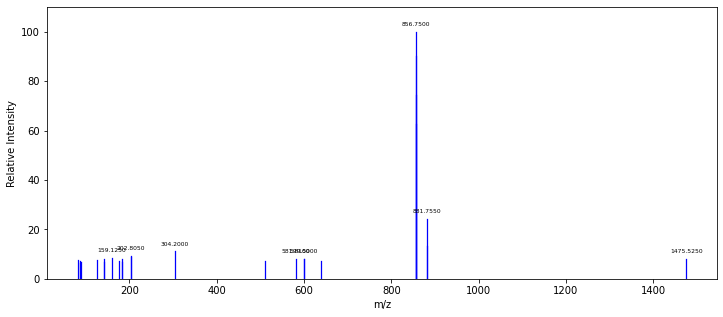

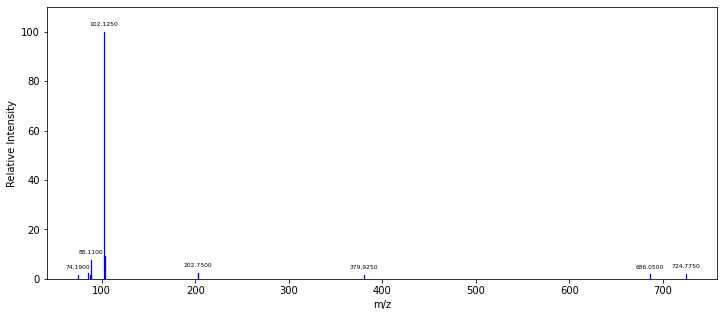

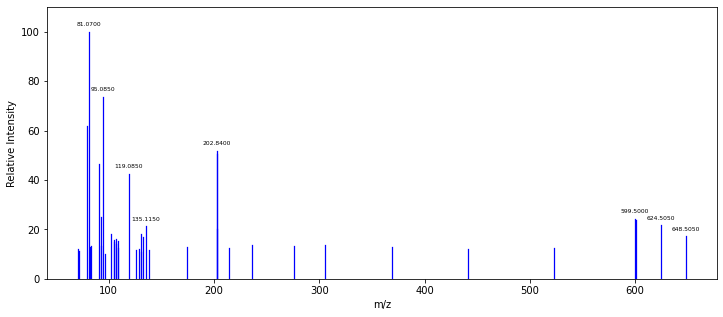

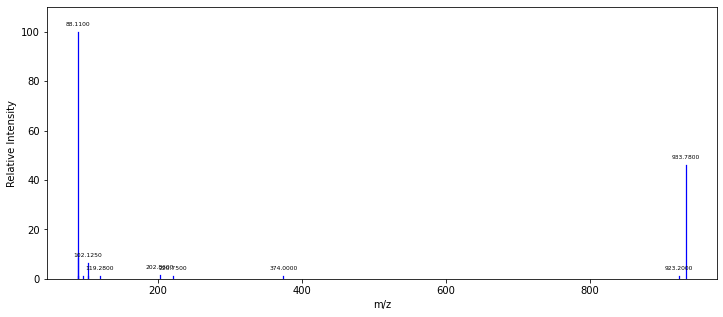

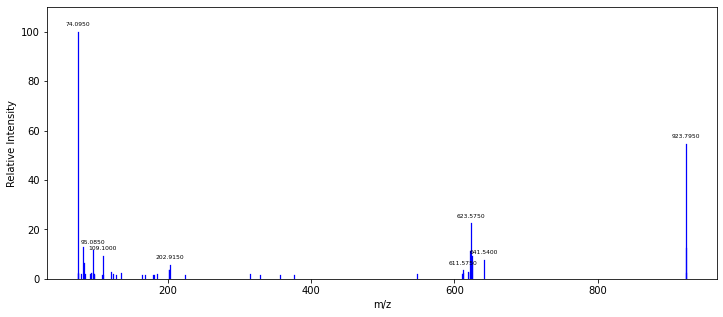

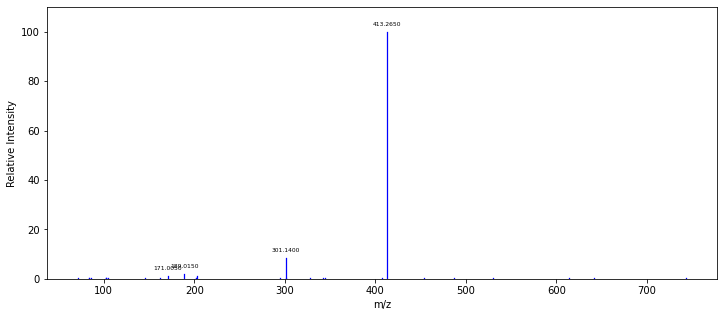

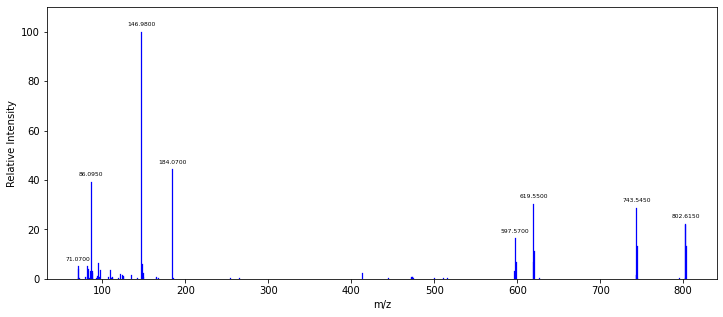

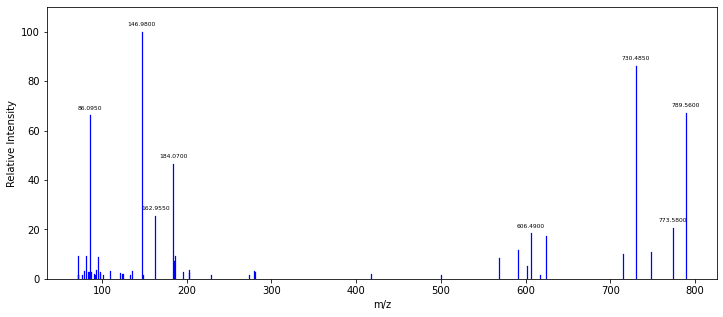

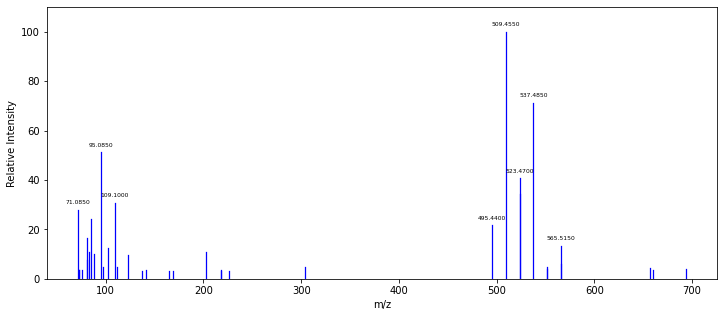

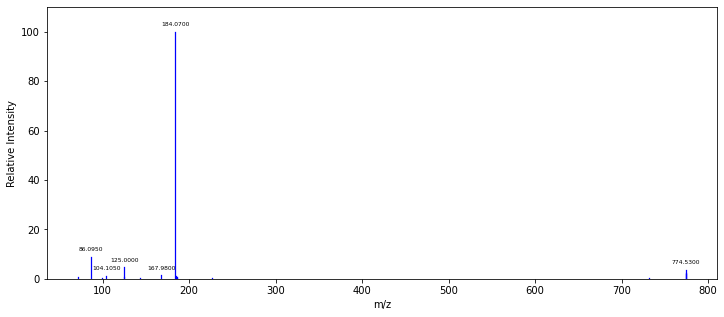

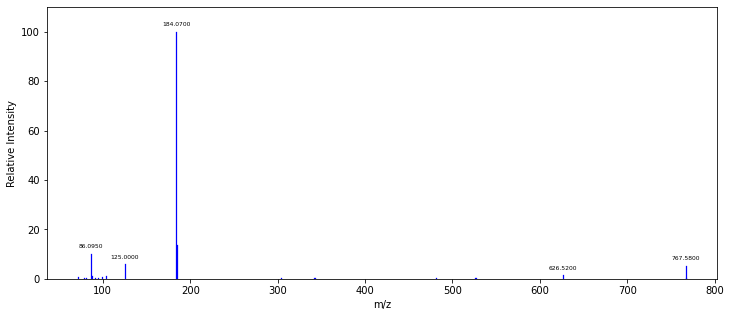

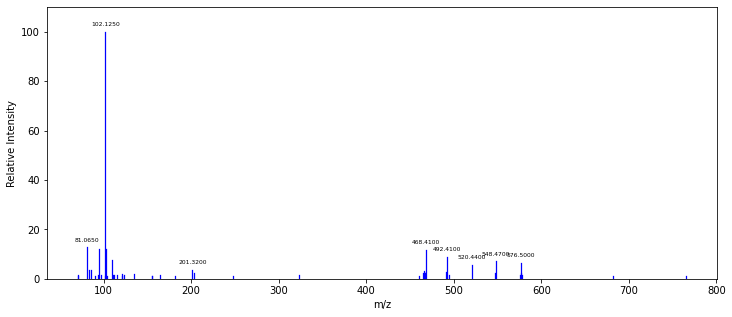

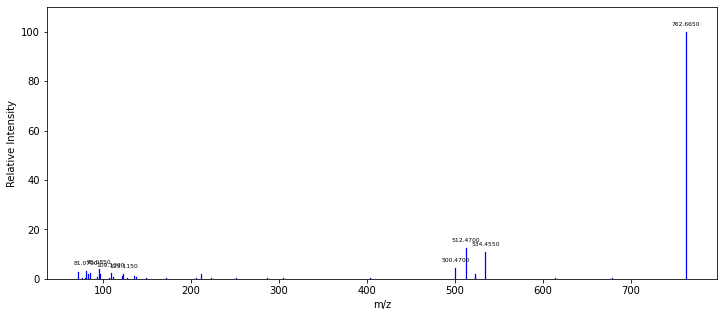

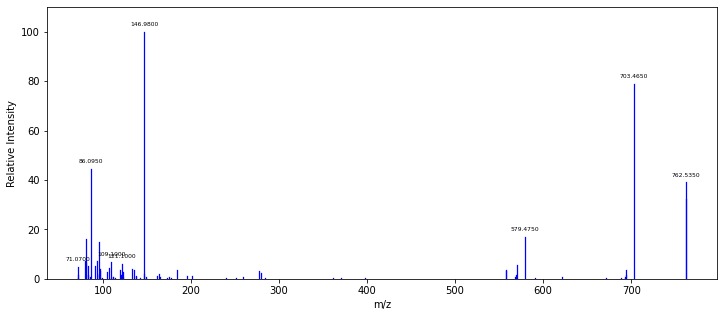

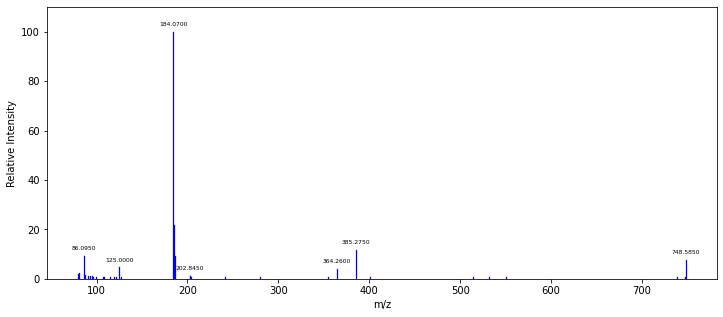

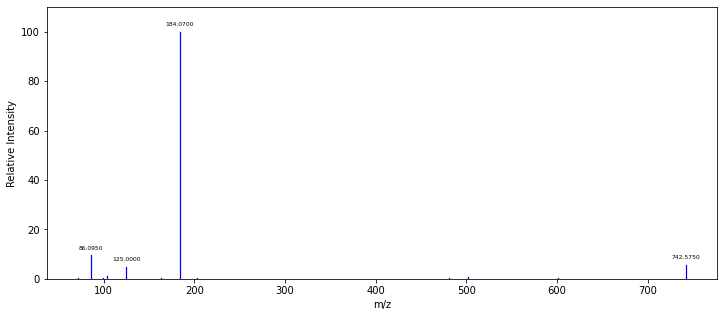

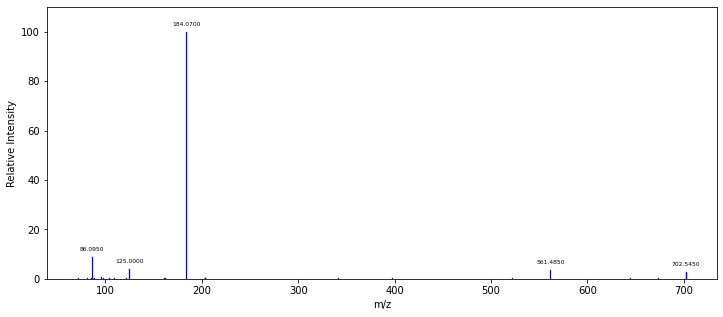

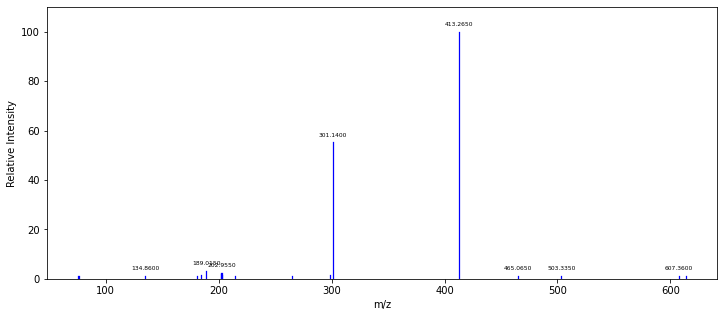

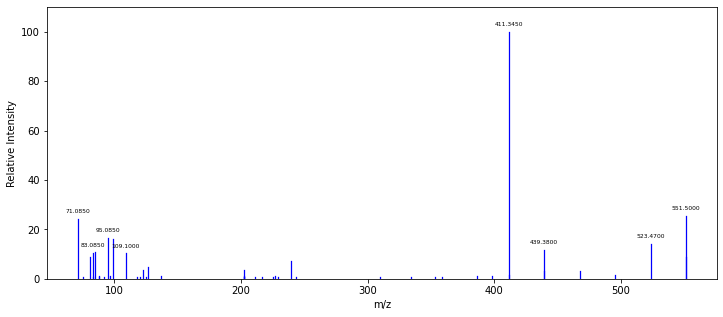

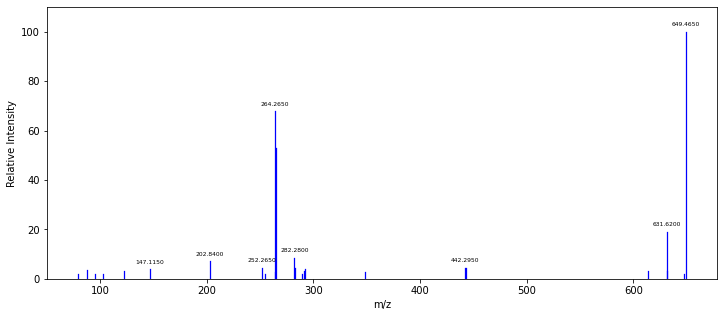

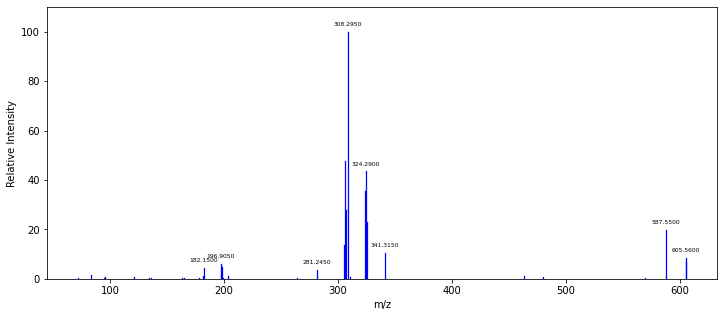

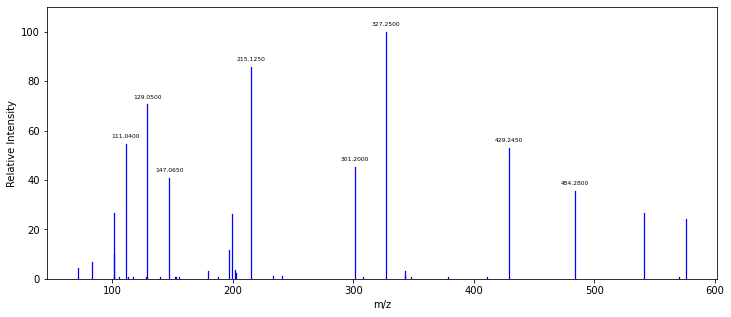

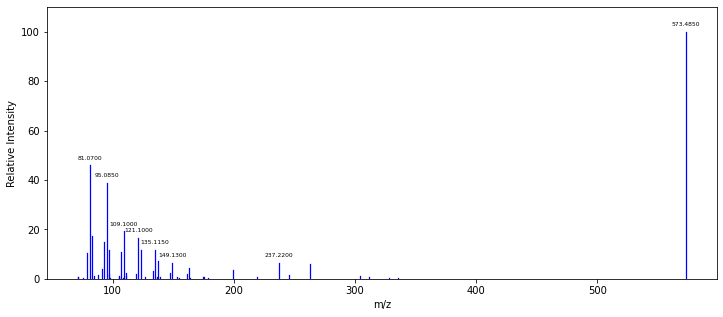

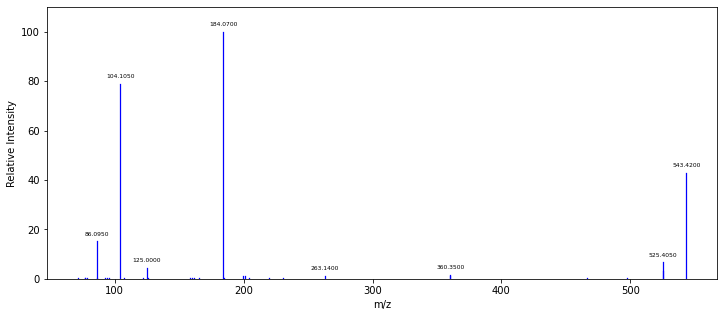

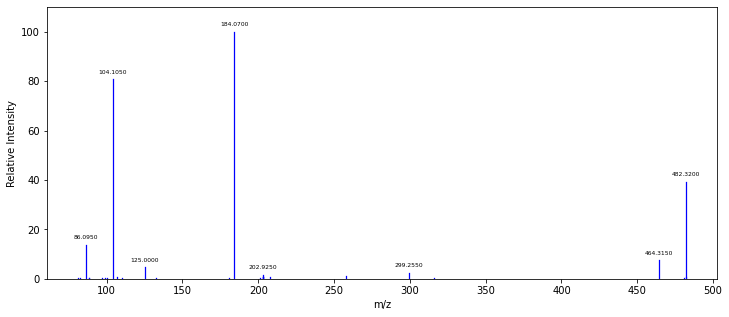

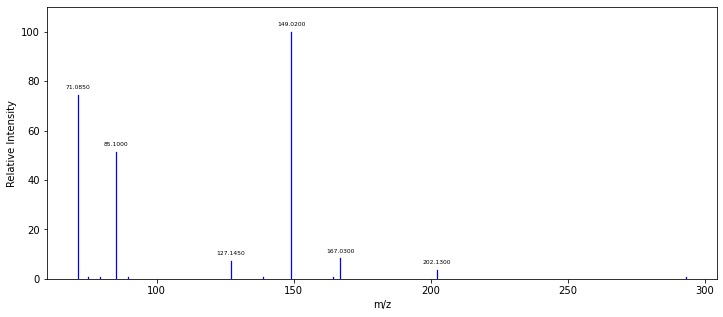

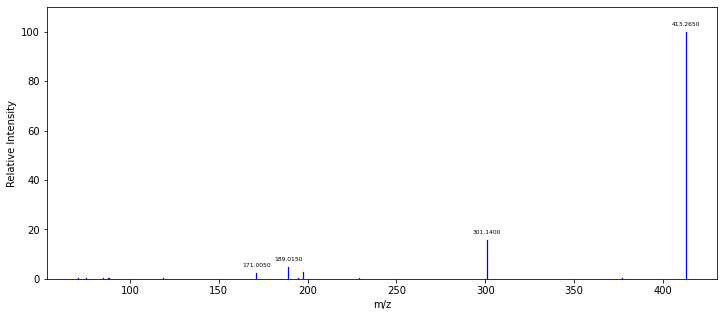

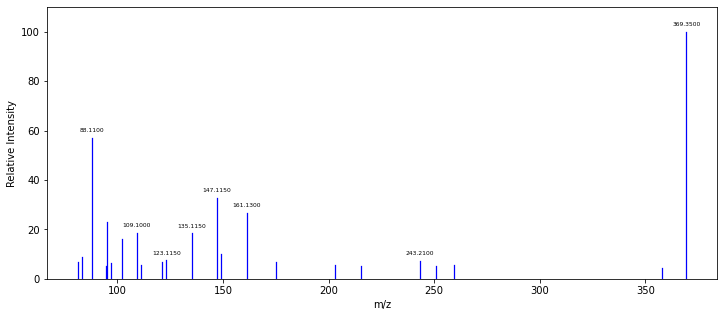

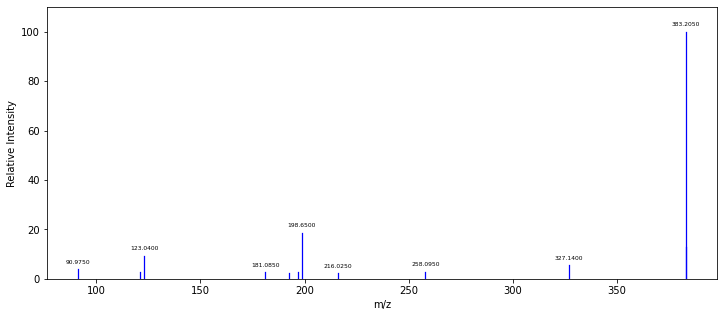

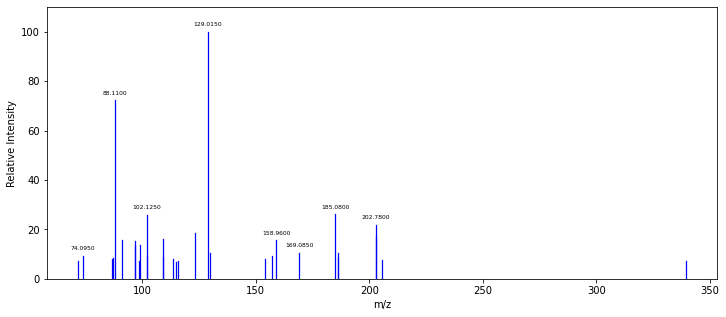

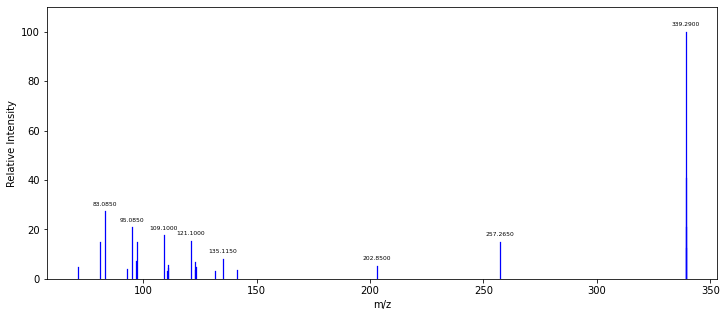

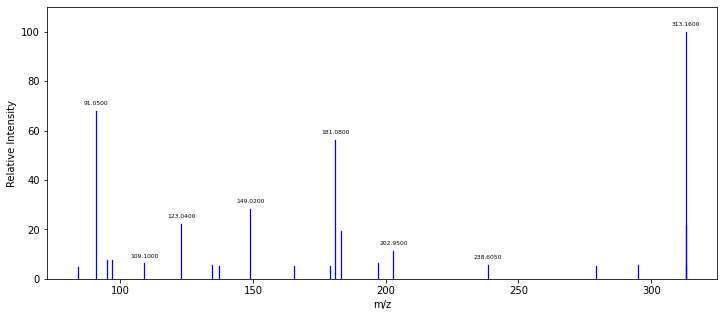

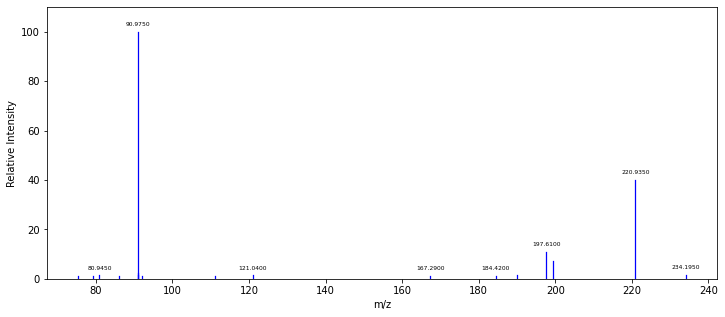

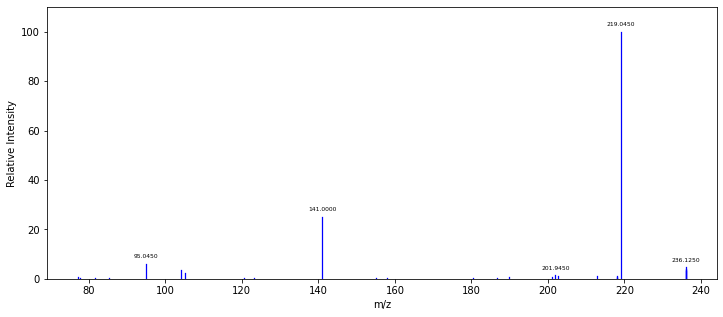

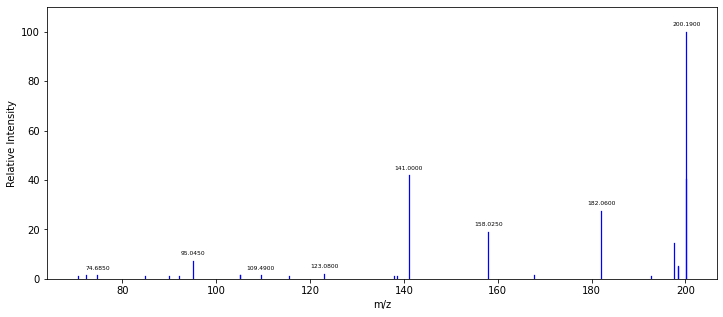

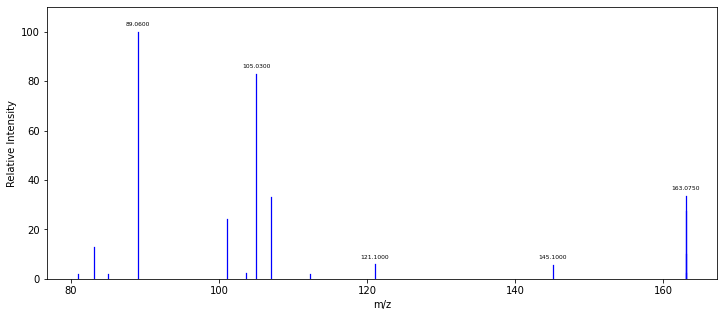

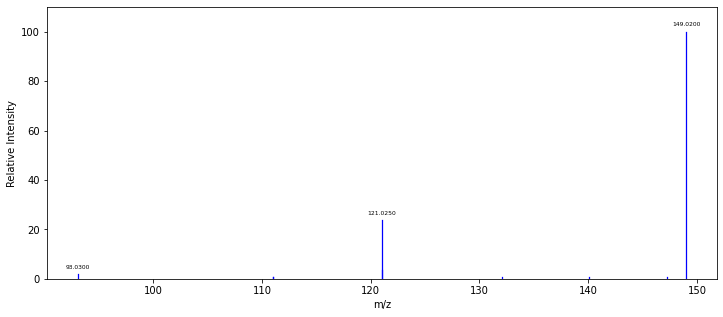

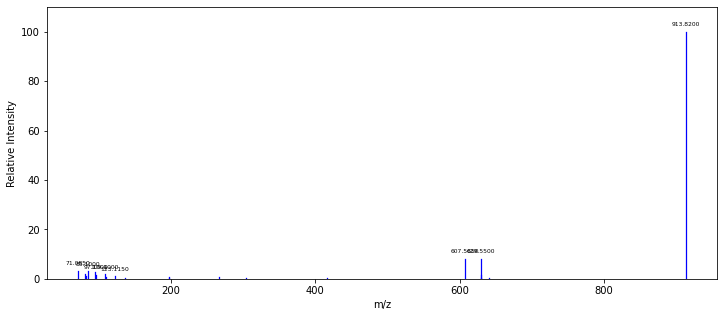

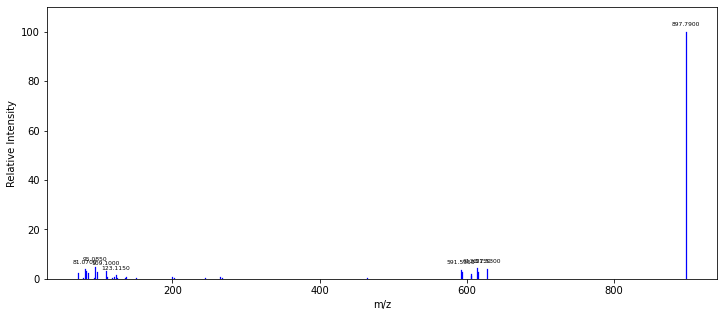

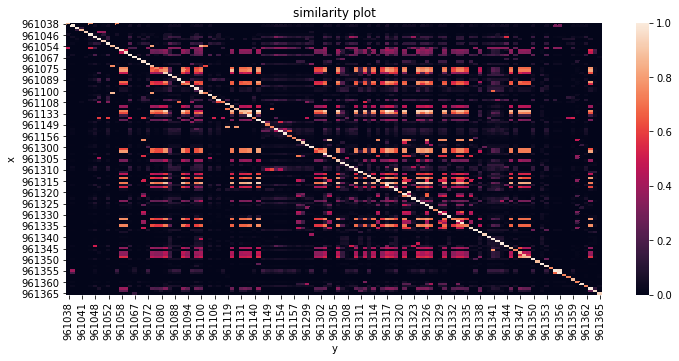

In [40]:

client =  CISClient(cis_url, cis_api_token)

if len(libraries) == 0:
    libraries = client.get_libraries()


for library in libraries:

    print(library)
    data = []
    compounds = client.get_compounds_by_type(library=library,target_type='CONFIRMED_CONSENSUS',autopage=True)

    print("contains {} confirmed".format(len(compounds)))
    for splash in compounds:
        compound = client.get_compound(library=library, splash=splash)
        generate_spectra_plot(compound)
        data.append(compound)

    sim = generate_similarity_plot(data)
    lib = to_dataframe(data).drop(['accurate_mass','spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)

    lib

    sim